In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### CARGA DEL DATASET

In [172]:
df = pd.read_csv('data/Titanic.csv', index_col='PassengerId')
datos = df.head(20)

### INFORMACIÓN DEL DATASET

### INFORMACIÓN DEL DATASET

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  892 non-null    int64  
 1   Pclass    892 non-null    int64  
 2   Name      892 non-null    object 
 3   Sex       892 non-null    object 
 4   Age       715 non-null    float64
 5   SibSp     892 non-null    int64  
 6   Parch     892 non-null    int64  
 7   Ticket    892 non-null    object 
 8   Fare      892 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  890 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.6+ KB


In [174]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,892.000000,892.000000,715.000000,892.000000,892.000000,892.000000
mean,0.383408,2.309417,29.702336,0.522422,0.381166,32.176793
std,0.486489,0.835923,14.516576,1.102264,0.805706,49.672283
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### CONSULTANDO Y ELIMINANDO DUPLICADOS

In [175]:
duplicados = df.duplicated().sum()
if duplicados > 0:
    print(f'Se encontraron {duplicados} filas duplicadas. Procediendo a eliminarlas')
    df.drop_duplicates(inplace=True)
else:
    print('No se encontraron filas duplicadas. No es necesario eliminarlas')

print('Dimensiones tras el paso de duplicados:', df.shape)

Se encontraron 1 filas duplicadas. Procediendo a eliminarlas
Dimensiones tras el paso de duplicados: (891, 11)


### IDENTIFICANDO Y ELIMINANDO NULOS

Identificando nulos

In [176]:
nulos_columnas = df.isnull().sum()
nulos_filas = df[df.isnull().any(axis=1)] #eje x
total_nulos = nulos_columnas.sum()


In [177]:
nulos_columnas

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [178]:
nulos_filas


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [179]:
total_nulos


np.int64(866)

Eliminando nulos

In [180]:
if nulos_columnas['Age'] > 0:
    df['Age'] = df['Age'].fillna(df['Age'].median())
    print('Reemplazo de nulos por la mediana')
else:
    print('No hay valores nulos que limpiar')


if nulos_columnas['Embarked'] > 0:
    df.dropna(subset=['Embarked'], inplace=True)
    print('Limpieza de nulos completa!')
else:
    print('No hay valores nulos que limpiar')
    

if nulos_columnas['Survived'] > 0:
    df.dropna(subset=['Survived'], inplace=True)
    print('Limpieza de nulos completada!')
else:
    print('No hay valores nulos que limpiar')

Reemplazo de nulos por la mediana
Limpieza de nulos completa!
No hay valores nulos que limpiar


### Eliminando Todos los Nulos

In [181]:
datos_sin_nulos = df.dropna()

### GRAFICA

Encontrando la cantidad de Supervivientes y de Fallecidos

In [182]:

supervivientes = df['Survived'].value_counts(1)
fallecidos = df['Survived'].value_counts(0)
print(supervivientes)
print(fallecidos)
    


Survived
0    0.617548
1    0.382452
Name: proportion, dtype: float64
Survived
0    549
1    340
Name: count, dtype: int64


Graficando

<BarContainer object of 2 artists>

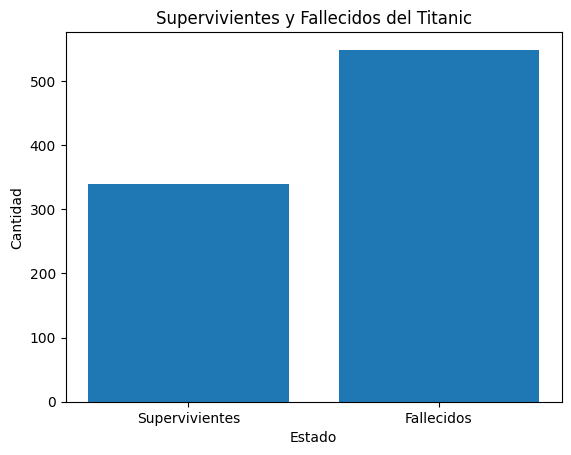

In [183]:
plt.title('Supervivientes y Fallecidos del Titanic')
plt.xlabel('Estado') #Título del eje x
plt.ylabel('Cantidad') #Título del eje y

Estado = ['Supervivientes', 'Fallecidos']
Cantidad = [340, 549]


plt.bar(Estado, Cantidad)


### Exportando el nuevo dataset sin nulos

In [184]:
output = 'data/Titanic-clean.csv'
datos_sin_nulos.to_csv(output)